<a href="https://colab.research.google.com/github/t1pen/OpenCV_Basics_Section_AlojadoStephenGabriel_SungaJairus/blob/main/OpenCV%20Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/misbah4064/opencvTutorial.git
%cd opencvTutorial/
from IPython.display import clear_output
clear_output()

# **Part 1: OpenCV Basics**

## **Lesson 1: Changing Image's Color Profiles**

(476, 640, 3)
(476, 640)
(476, 640, 3)


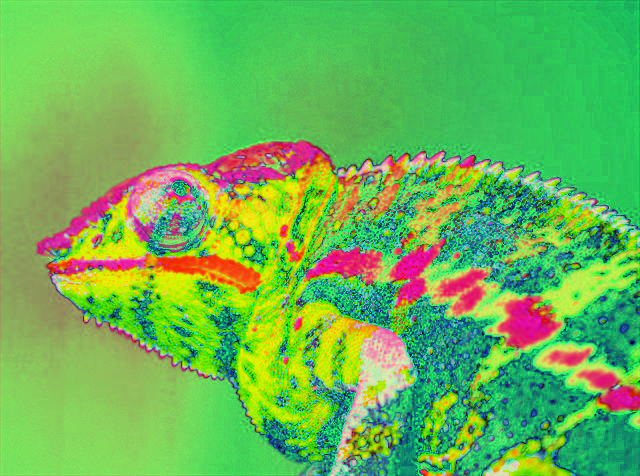

In [2]:
import cv2
from google.colab.patches import cv2_imshow

#colorful image - 3 channels
image = cv2.imread("images/color.jpg")
print(image.shape)

#grayscale image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray.shape)

#HSV Image
HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
print(HSV.shape)
cv2_imshow(HSV)

## **Lesson 2: Edge Detection**

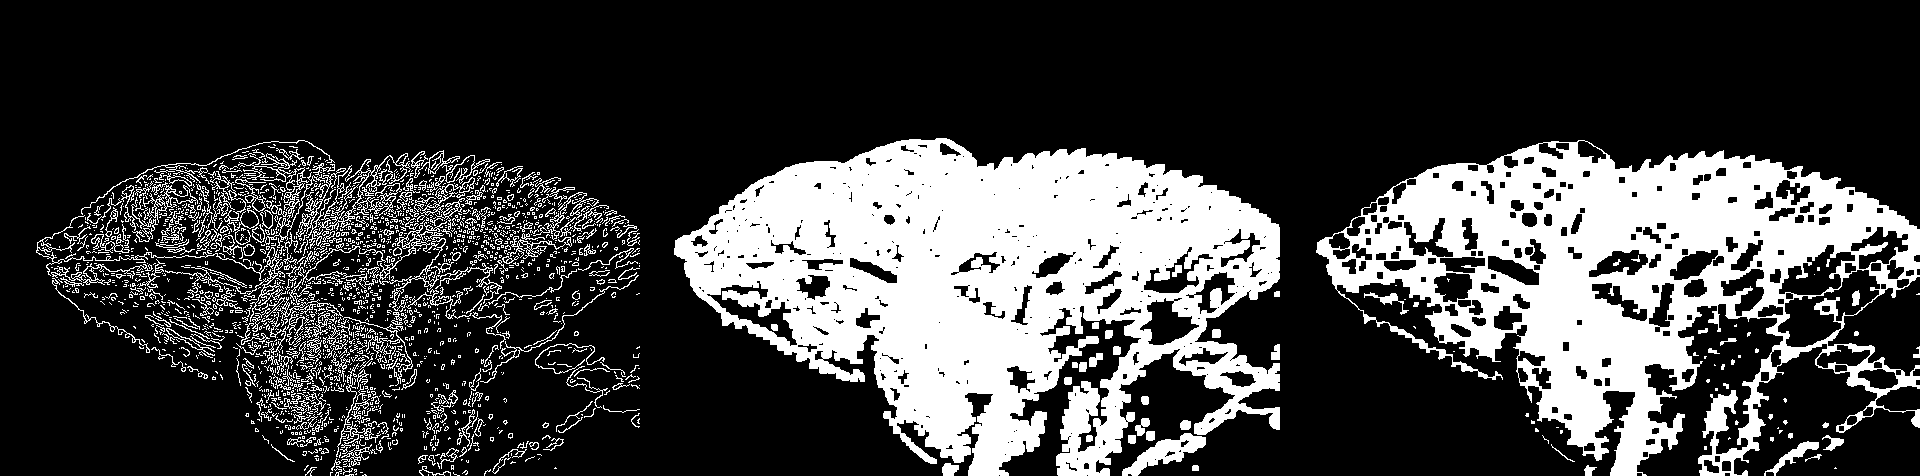

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread("images/color.jpg")
# cv2_imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(gray,150, 200)
# cv2_imshow(canny_image)

# Erosion and Dilation
kernel = np.ones((5,5), np.uint8)
#Dilation
dilate_image = cv2.dilate(canny_image, kernel, iterations=1)
# cv2_imshow(dilate_image)
#Erosion
# kernel = np.ones((1,1), np.uint8)
erode_image = cv2.erode(dilate_image,kernel, iterations=1)
# cv2_imshow(erode_image)

display = np.hstack((canny_image,dilate_image,erode_image))
cv2_imshow(display)

## **Lesson 3: Image Manipulation**

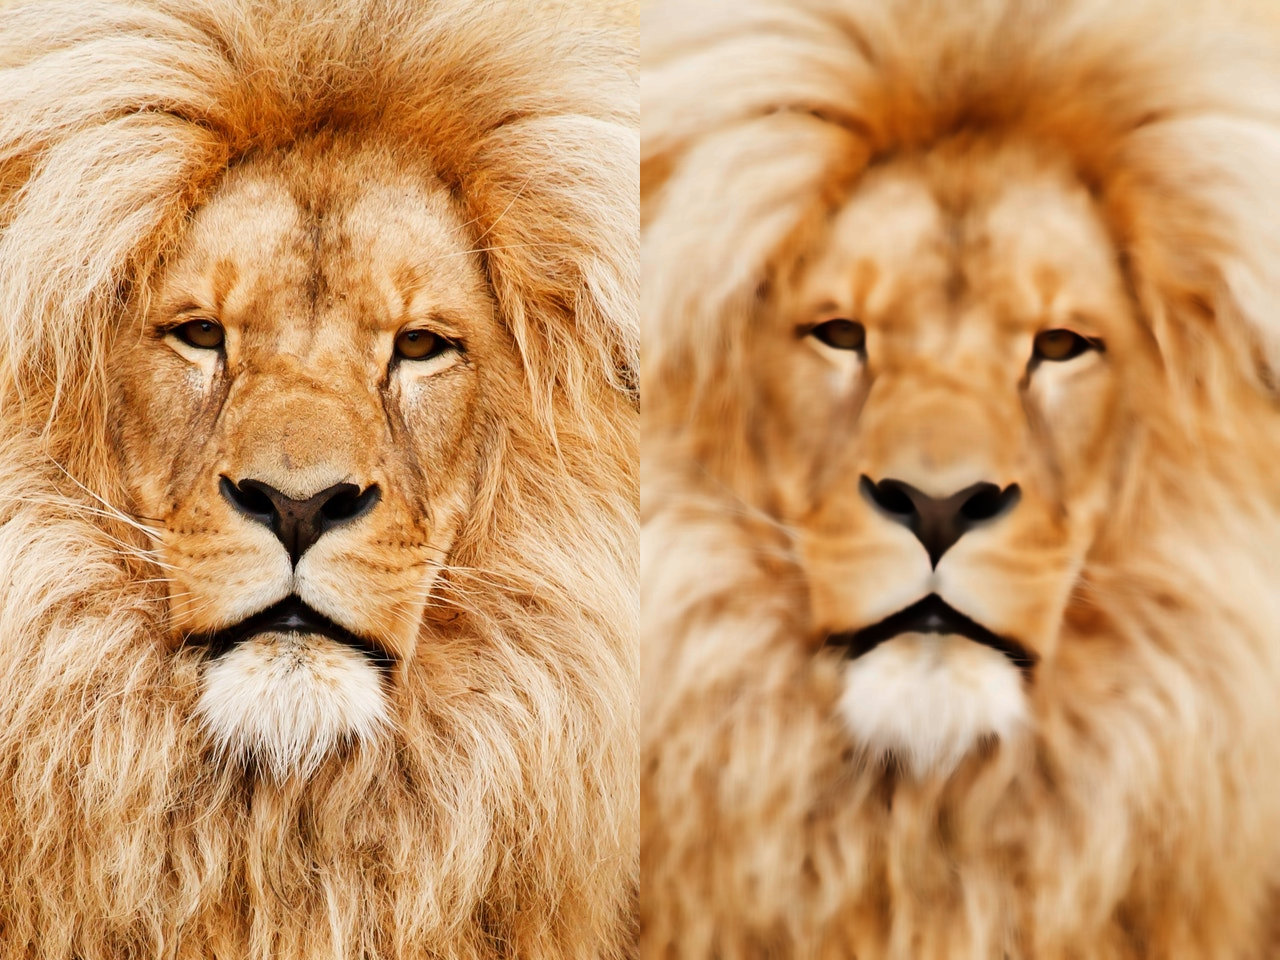

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread("images/lion.jpg")
# cv2_imshow(image)
dst = cv2.fastNlMeansDenoisingColored(image, None, 50, 20, 7, 15)

display = np.hstack((image, dst))
cv2_imshow(display)



## **Lesson 4: Drawing Shapes and Writing Text on Images**

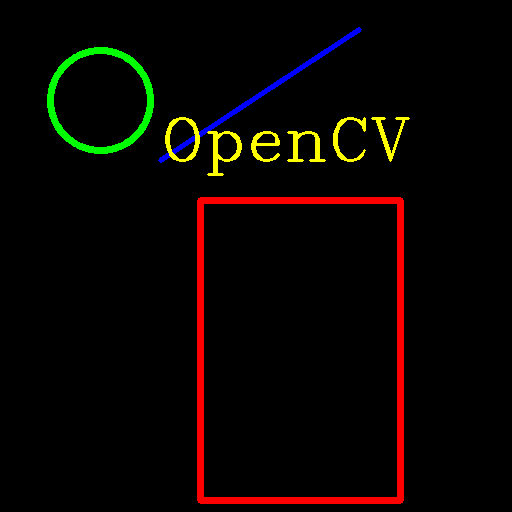

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = np.zeros((512, 512, 3), np.uint8)
#uint8: 0 to 255

# Drawing Function
# Draw a Circle
cv2.circle(img, (100,100), 50, (0,255,0),5)
# Draw a Rectangle
cv2.rectangle(img,(200,200),(400,500),(0,0,255),5)
#Draw a Line
cv2.line(img, (160,160),(359,29),(255,0,0),3)
#Write a Text
cv2.putText(img,"OpenCV",(160,160),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,255),2)
# Displaying the Image
cv2_imshow(img)

# **Part 2: Intermediate Exercises**

## **Lesson 1: Color Detection**

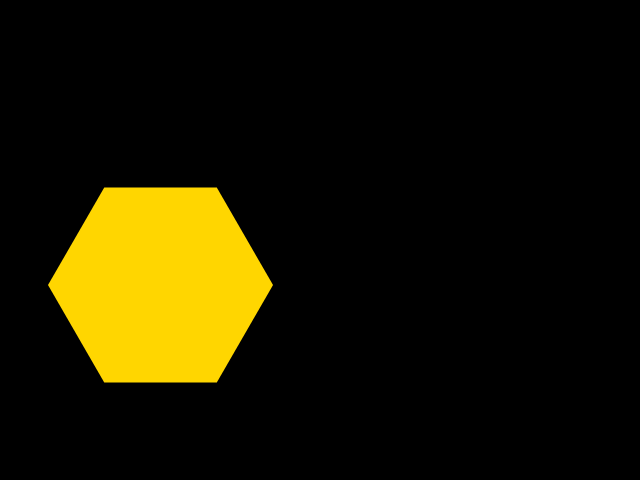

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#BGR Image . It is represented in Blue, Green and Red Channels...
image = cv2.imread("images/shapes.png")
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

# Blue Color Triangle
# lower_hue = np.array([65,0,0])
# upper_hue = np.array([110, 255,255])

# Red Color
# lower_hue = np.array([0,0,0])
# upper_hue = np.array([20,255, 255])

# Green Color
# lower_hue = np.array([46,0,0])
# upper_hue = np.array([91,255,255])

# Yellow Color
lower_hue = np.array([21,0,0])
upper_hue = np.array([45,255,255])

mask = cv2.inRange(hsv,lower_hue,upper_hue)
# cv2_imshow(mask)
result = cv2.bitwise_and(image, image, mask = mask)
cv2_imshow(result)
# cv2_imshow(image)

## **Lesson 2: Face Detection**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier("files/haarcascade_frontalface_default.xml")
# img = cv2.imread("images/person.jpg")
img = cv2.imread("images/group.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray,1.3,5)
# print(faces)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

cv2_imshow(img)


## **Lesson 3: Shape Detection**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("images/shapes.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,50,255,1)
contours,h = cv2.findContours(thresh,1,2)
# cv2_imshow(thresh)
for cnt in contours:
  approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
  n = len(approx)
  if n==6:
    # this is a hexagon
    print("We have a hexagon here")
    cv2.drawContours(img,[cnt],0,255,10)
  elif n==3:
    # this is a triangle
    print("We found a triangle")
    cv2.drawContours(img,[cnt],0,(0,255,0),3)
  elif n>9:
    # this is a circle
    print("We found a circle")
    cv2.drawContours(img,[cnt],0,(0,255,255),3)
  elif n==4:
    # this is a Square
    print("We found a square")
    cv2.drawContours(img,[cnt],0,(255,255,0),3)
cv2_imshow(img)


# **Part 3: Projects**

## **Project 1: Tracking a Ball**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

ball = []
cap = cv2.VideoCapture("videos/video.mp4")
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'),10,(1920,1080))
while cap.isOpened():
  ret, frame = cap.read()
  if ret is False:
    break
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  lower_hue = np.array([21,0,0])
  upper_hue = np.array([45,255,255])
  mask = cv2.inRange(hsv,lower_hue, upper_hue)

  (contours,_)=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  center = None

  if len(contours)>0:
    c = max(contours, key=cv2.contourArea)
    ((x,y),radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    try:
      center = (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"]))
      cv2.circle(frame, center,10, (255,0,0),-1)
      ball.append(center)
    except:
      pass
    if len(ball)>2:
      for i in range(1,len(ball)):
        cv2.line(frame, ball[i-1], ball[i],(0,0,255),5)
  out.write(frame)
out.release()




## **Project 2: Face Recognition**

Clone Repositories and download dependencies

In [ ]:
!git clone https://github.com/misbah4064/face_recognition.git
!pip install face_recognition
%cd face_recognition

Create Encoding Profiles using known face images

In [ ]:
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Creating the encoding profiles
face_1 = face_recognition.load_image_file("elon.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("Donald Trump.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("jeffbezos.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
                        face_1_encoding,
                        face_2_encoding,
                        face_3_encoding
]

known_face_names = [
                    "Elon Musk",
                    "Donald Trump",
                    "Jeff Bezos"
]

Run Face Recognition on unknown faces

In [ ]:

file_name = "unknown_do.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

for (top,right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "Unknown"

  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
  cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom),(0,255,0),3)
  cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2, cv2.LINE_AA)

cv2_imshow(unknown_image_to_draw)
